In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('H:\Machine Learning Module\Data sets\iris.csv')

In [4]:
#x = df.iloc[:, [1, 2, 3, 4]].values
#x

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [9]:
df1 = df
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
x=df.drop('class',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


[680.82439999999997, 152.36870647733903, 78.940841426146008, 57.317873214285711, 46.535582051282049, 38.930963049671746, 34.598978434287133, 30.085307692307694, 28.063274732725539, 26.587316820410813]


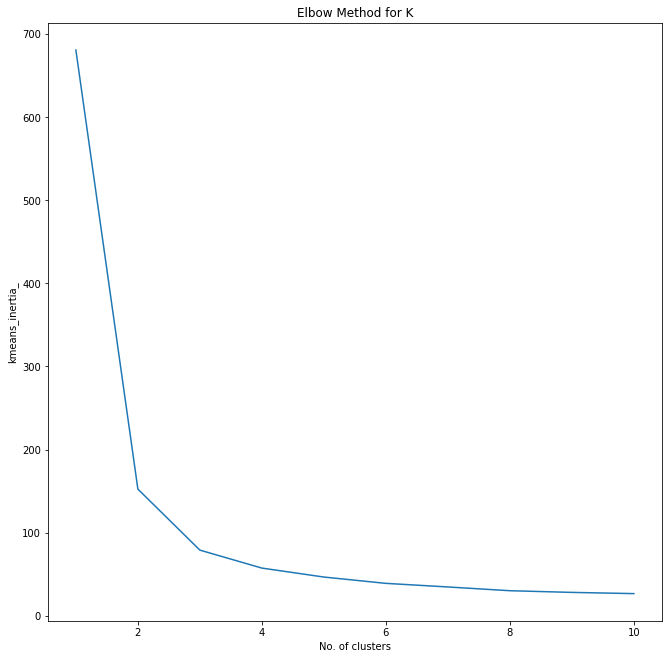

In [11]:
plt.figure(figsize=(11,11))
wcss =[] #empty list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init= 'k-means++' , random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method for K')
plt.xlabel('No. of clusters')
plt.ylabel('kmeans_inertia_')

plt.show()

In [12]:
# K means algorithm
#fitting K-means to the dataset

kmeans = KMeans(n_clusters=3 , init= 'k-means++' , random_state = 42)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

#beginning of the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1
#New dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
#Adding cluster to the dataset1
df1['cluster']=cluster
#means of clusters
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

#IN output 152724.4 is the mean value of balance for cluter 1 likewise for all columns

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
1,5.9,2.7,4.4,1.4
2,5.0,3.4,1.5,0.2
3,6.8,3.1,5.7,2.1


In [13]:
kmeans.predict([[4.6,3.1,1.5,0.2]])

array([1])

In [14]:
print(kmeans.n_clusters) #number of clusters 
print(kmeans.cluster_centers_) #centroids values

3
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


No handles with labels found to put in legend.


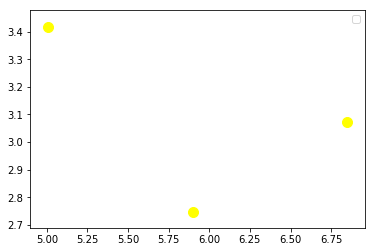

In [49]:
#Visualising the clusters
#plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red')
##plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow')

plt.legend()
plt.show()